In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. MOdel building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming the columns
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)

In [11]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['Target']=encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df.drop_duplicates(keep='first')

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

# 2. EDA

In [21]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

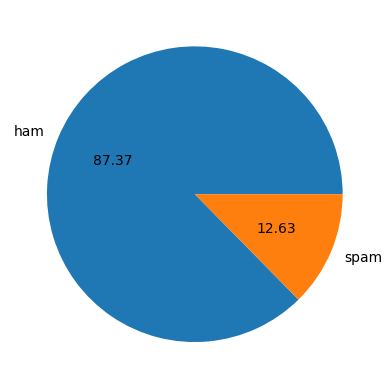

In [24]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\ASHISH
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_characters']=df['text'].apply(len)

In [29]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [33]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#for ham messeges
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

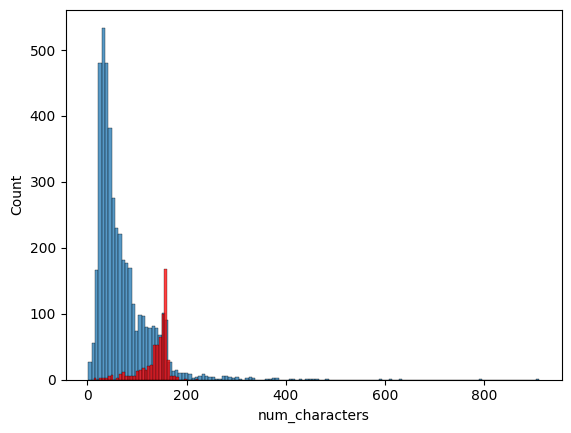

In [39]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

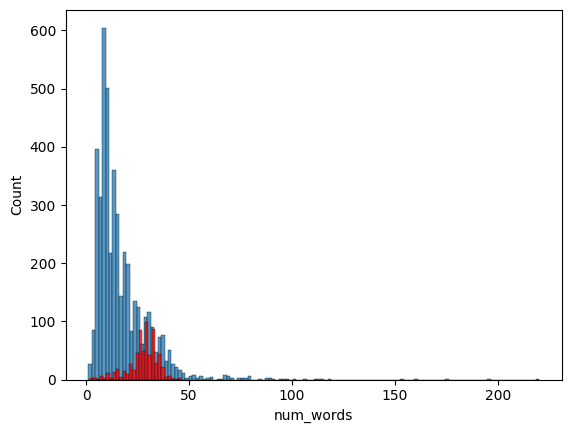

In [40]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

In [41]:
print(df.columns)


Index(['Target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')


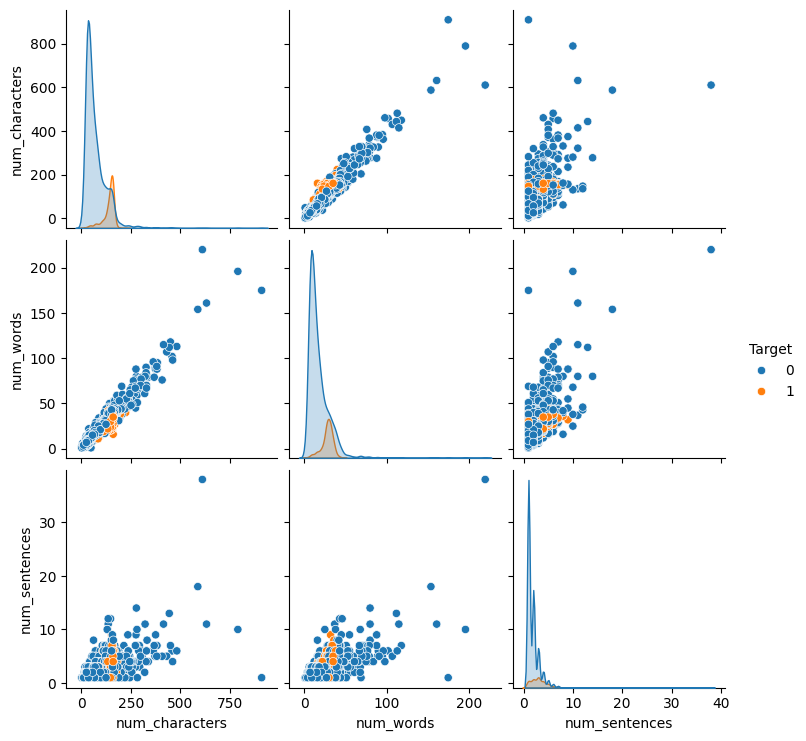

In [42]:
sns.pairplot(data=df,hue='Target')

In [43]:
print(df.dtypes)


Target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


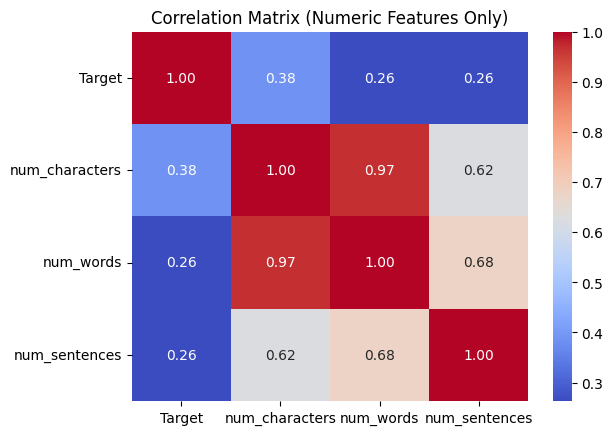

In [44]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

# 3. Data Processing

Lower case

Tokenzation

Removing special Characters

Removing Stop words and punctuation

stemming


In [45]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    return text

In [46]:
transform_text("HI how ARE You")

['hi', 'how', 'are', 'you']

In [47]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [48]:
df['text'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    return y

In [50]:
transform_text("hi HOW are you@#")

['hi', 'how', 'are', 'you']

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [55]:
transform_text("hi how are you AshiSh ##@")

['hi', 'ashish']

In [56]:
transform_text("Did you like my presentation on ML?")

['like', 'presentation', 'ml']

In [57]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [58]:
from nltk.stem.porter import PorterStemmer

In [59]:
ps=PorterStemmer()
ps.stem('loving')

'love'

In [60]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [61]:
transform_text("I loved the YT lectures On MAchine Learning. HOw about you?")

'love yt lectur machin learn'

In [62]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [63]:
transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [64]:
df['transformed_text']=df['text'].apply(transform_text)

In [65]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

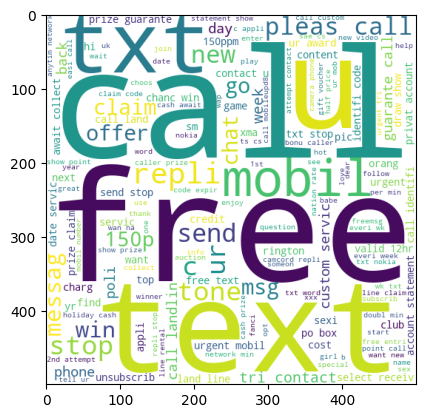

In [67]:
spam_wc= wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)


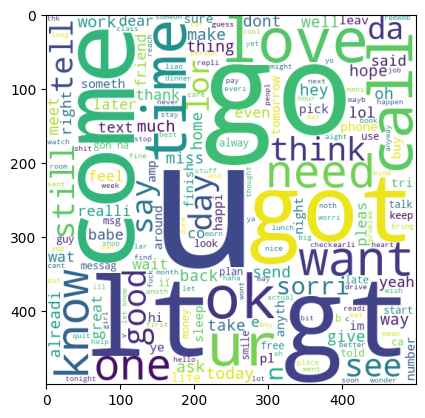

In [68]:
ham_wc= wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)


In [69]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].to_list():
    for words in msg.split():
        spam_corpus.append(words)

In [71]:
len(spam_corpus)

9939

In [72]:
from collections import Counter
top_words_spam=Counter(spam_corpus).most_common(30)
top_words_spam

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [73]:
dff=pd.DataFrame(top_words_spam,columns=['words','counts'])
dff

,words,counts
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


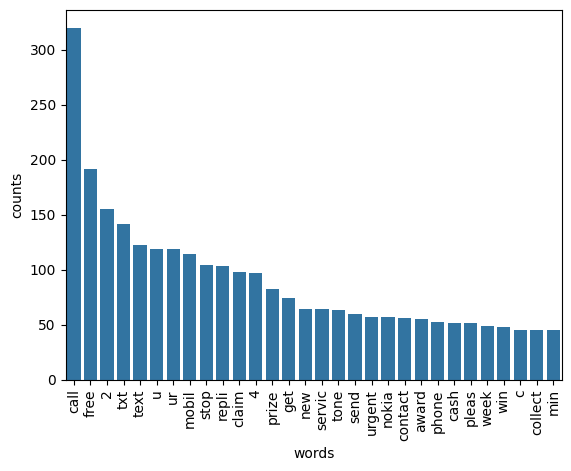

In [74]:
sns.barplot(x='words', y='counts', data=dff)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].to_list():
    for words in msg.split():
        ham_corpus.append(words)

In [77]:
len(ham_corpus)

35404

In [78]:
from collections import Counter
top_words_ham=Counter(ham_corpus).most_common(30)
top_words_ham

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [79]:
dfff=pd.DataFrame(top_words_ham,columns=['words','counts'])
dfff

,words,counts
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


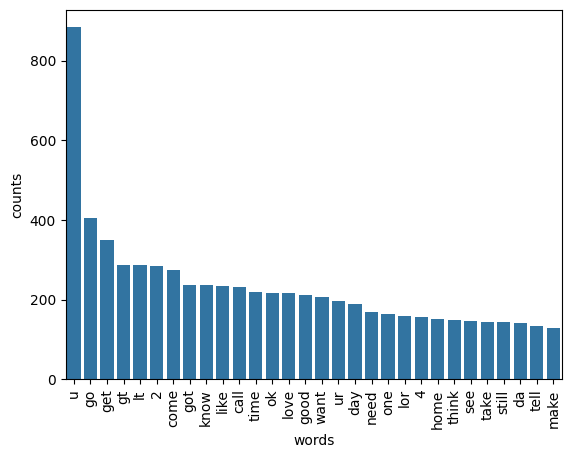

In [80]:
sns.barplot(x='words', y='counts', data=dfff)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [81]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [124]:
x= cv.fit_transform(df['transformed_text']).toarray()

In [125]:
x.shape

(5169, 6708)

In [126]:
y=df['Target'].values

In [127]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [132]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [133]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [134]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
# Creating classifier objects with parameters
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # FIX: 'l1', not '11'
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [137]:
clfs = {
    'SVC'      : svc,
    'KN'       : knc,
    'NB'       : mnb,
    'DT'       : dtc,
    'LR'       : lrc,
    'RF'       : rfc,
    'AdaBoost' : abc,
    'BgC'      : bc,
    'ETC'      : etc,
    'GBDT'     : gbdt,
    'XGB'      : xgb   # ✅ Added proper key name
}


In [138]:
def train_classifierr(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use average param for multi-class
    return accuracy, precision

In [139]:
train_classifierr(svc, x_train, x_test, y_train, y_test)

(0.9264990328820116, 0.9244646892519673)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    acc, prec = train_classifierr(clf, x_train, x_test, y_train, y_test)
    
    print(f"For {name}:")
    print(f"  Accuracy  = {acc:.4f}")
    print(f"  Precision = {prec:.4f}")
    
    accuracy_scores.append(acc)
    precision_scores.append(prec)


For SVC:
  Accuracy  = 0.9265
  Precision = 0.9245
For KN:
  Accuracy  = 0.9062
  Precision = 0.9154
For NB:
  Accuracy  = 0.9642
  Precision = 0.9661
For DT:
  Accuracy  = 0.9246
  Precision = 0.9240
For LR:
  Accuracy  = 0.9710
  Precision = 0.9711
For RF:
  Accuracy  = 0.9720
  Precision = 0.9728
For AdaBoost:
  Accuracy  = 0.9197
  Precision = 0.9210
For BgC:
  Accuracy  = 0.9623
  Precision = 0.9613


In [100]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precison":precision_scores}).sort_values("Precison",ascending=False)

In [101]:
performance_df

,Algorithm,Accuracy,Precison
8,ETC,0.976789,0.977139
10,XGB,0.973888,0.973899
5,RF,0.971954,0.972833
4,LR,0.970986,0.971057
2,NB,0.964217,0.966127
7,BgC,0.962282,0.961321
9,GBDT,0.943907,0.943934
0,SVC,0.926499,0.924465
3,DT,0.924565,0.924023
6,AdaBoost,0.919729,0.921025


In [102]:
performance_df22 = pd.melt (performance_df, id_vars = "Algorithm")
performance_df22

,Algorithm,variable,value
0,ETC,Accuracy,0.976789
1,XGB,Accuracy,0.973888
2,RF,Accuracy,0.971954
3,LR,Accuracy,0.970986
4,NB,Accuracy,0.964217
5,BgC,Accuracy,0.962282
6,GBDT,Accuracy,0.943907
7,SVC,Accuracy,0.926499
8,DT,Accuracy,0.924565
9,AdaBoost,Accuracy,0.919729


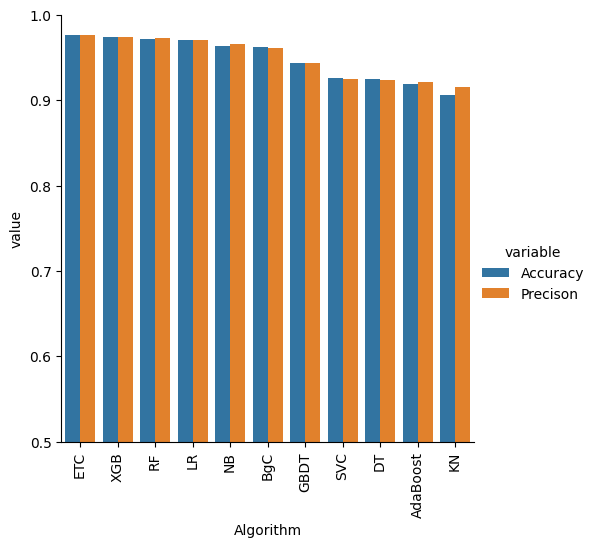

In [103]:
sns.catplot(data=performance_df22,x="Algorithm", y="value", hue="variable",kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
# model improve
# 1. change the max_features parameter of tfIdf

In [ ]:
performance_df24=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"Precison_max_fit_3000":precision_scores}).sort_values("Precison_max_fit_3000",ascending=False)

NameError: name 'pd' is not defined